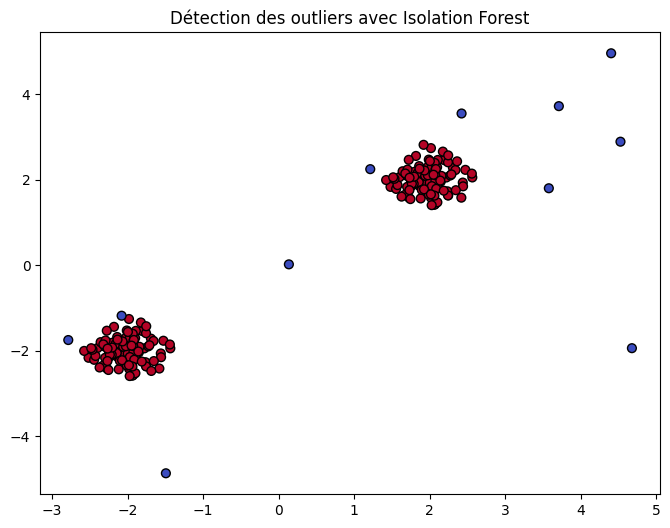

          x1        x2  IQR_outlier     MAD_z  MAD_outlier  DBSCAN_outlier  \
0   2.149014  1.958521        False  0.182323        False           False   
1   2.194307  2.456909        False  0.194195        False           False   
2   1.929754  1.929759        False  0.124850        False           False   
3   2.473764  2.230230        False  0.267447        False           False   
4   1.859158  2.162768        False  0.106345        False           False   
5   1.860975  1.860281        False  0.106822        False           False   
6   2.072589  1.426016        False  0.162290        False           False   
7   1.482525  1.831314        False  0.007622        False           False   
8   1.696151  2.094274        False  0.063618        False           False   
9   1.727593  1.576309        False  0.071859        False           False   
10  2.439695  1.932267        False  0.258516        False           False   
11  2.020258  1.572576        False  0.148573        False      

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from scipy import stats

# -----------------------------
# 1. Génération de données simulées
# -----------------------------
np.random.seed(42)
# données normales (cluster principal)
X = 0.3 * np.random.randn(100, 2)
X = np.r_[X + 2, X - 2]

# ajouter quelques outliers
outliers = np.random.uniform(low=-6, high=6, size=(10, 2))
X = np.r_[X, outliers]

df = pd.DataFrame(X, columns=["x1", "x2"])

# -----------------------------
# 2. Méthode IQR (univariée sur x1 par ex.)
# -----------------------------
Q1 = df["x1"].quantile(0.25)
Q3 = df["x1"].quantile(0.75)
IQR = Q3 - Q1
df["IQR_outlier"] = ( (df["x1"] < Q1 - 1.5*IQR) | (df["x1"] > Q3 + 1.5*IQR) )

# -----------------------------
# 3. Z-score robuste (MAD)
# -----------------------------
median = df["x1"].median()
MAD = np.median(np.abs(df["x1"] - median))
df["MAD_z"] = 0.6745 * (df["x1"] - median) / MAD
df["MAD_outlier"] = np.abs(df["MAD_z"]) > 3

# -----------------------------
# 4. DBSCAN (multivarié)
# -----------------------------
db = DBSCAN(eps=0.8, min_samples=5).fit(X)
df["DBSCAN_outlier"] = db.labels_ == -1  # -1 = bruit

# -----------------------------
# 5. LOF (Local Outlier Factor)
# -----------------------------
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df["LOF_outlier"] = lof.fit_predict(X) == -1

# -----------------------------
# 6. Isolation Forest
# -----------------------------
iso = IsolationForest(contamination=0.05, random_state=42)
df["IF_outlier"] = iso.fit_predict(X) == -1

# -----------------------------
# Visualisation (Isolation Forest en exemple)
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(df["x1"], df["x2"], c=~df["IF_outlier"], cmap="coolwarm", s=40, edgecolor="k")
plt.title("Détection des outliers avec Isolation Forest")
plt.show()

# Aperçu des résultats
print(df.head(15))


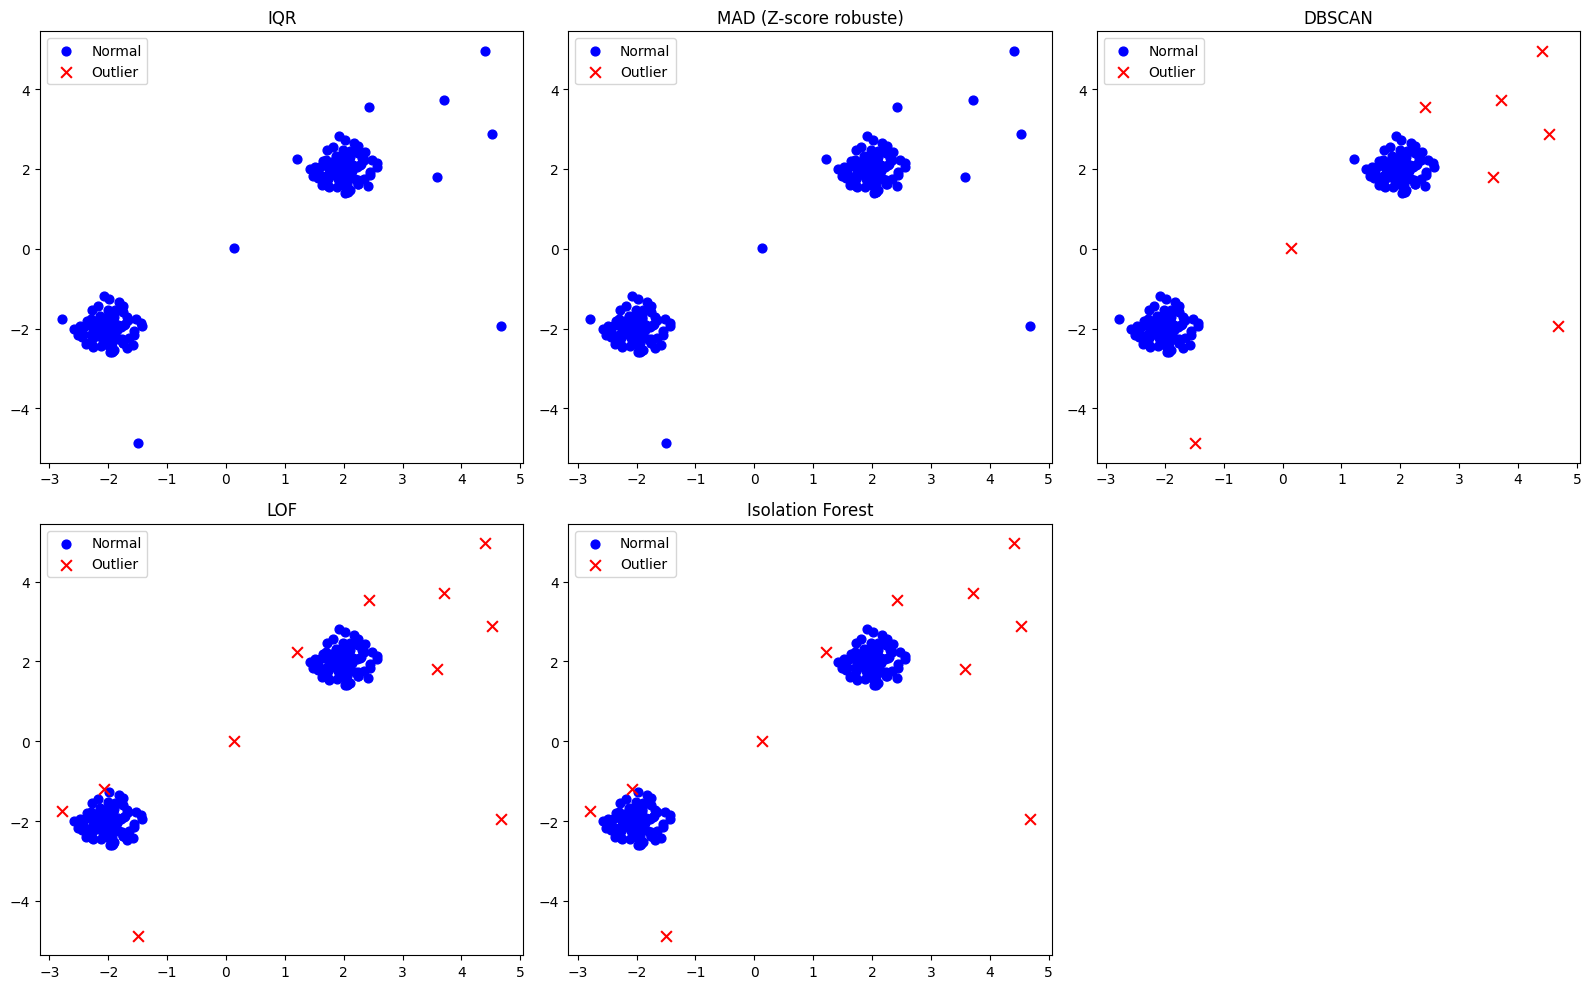

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

# -----------------------------
# 1. Génération de données simulées
# -----------------------------
np.random.seed(42)
X = 0.3 * np.random.randn(100, 2)
X = np.r_[X + 2, X - 2]
outliers = np.random.uniform(low=-6, high=6, size=(10, 2))
X = np.r_[X, outliers]
df = pd.DataFrame(X, columns=["x1", "x2"])

# -----------------------------
# 2. Méthode IQR (univariée sur x1)
# -----------------------------
Q1, Q3 = df["x1"].quantile([0.25, 0.75])
IQR = Q3 - Q1
df["IQR_outlier"] = ( (df["x1"] < Q1 - 1.5*IQR) | (df["x1"] > Q3 + 1.5*IQR) )

# -----------------------------
# 3. Z-score robuste (MAD)
# -----------------------------
median = df["x1"].median()
MAD = np.median(np.abs(df["x1"] - median))
df["MAD_z"] = 0.6745 * (df["x1"] - median) / MAD
df["MAD_outlier"] = np.abs(df["MAD_z"]) > 3

# -----------------------------
# 4. DBSCAN (multivarié)
# -----------------------------
db = DBSCAN(eps=0.8, min_samples=5).fit(X)
df["DBSCAN_outlier"] = db.labels_ == -1

# -----------------------------
# 5. LOF (Local Outlier Factor)
# -----------------------------
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df["LOF_outlier"] = lof.fit_predict(X) == -1

# -----------------------------
# 6. Isolation Forest
# -----------------------------
iso = IsolationForest(contamination=0.05, random_state=42)
df["IF_outlier"] = iso.fit_predict(X) == -1

# -----------------------------
# Visualisations
# -----------------------------
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
methods = ["IQR_outlier", "MAD_outlier", "DBSCAN_outlier", "LOF_outlier", "IF_outlier"]
titles = ["IQR", "MAD (Z-score robuste)", "DBSCAN", "LOF", "Isolation Forest"]

for ax, method, title in zip(axes.flatten(), methods, titles):
    ax.scatter(df["x1"][~df[method]], df["x2"][~df[method]], 
               c="blue", s=40, label="Normal")
    ax.scatter(df["x1"][df[method]], df["x2"][df[method]], 
               c="red", s=60, marker="x", label="Outlier")
    ax.set_title(title)
    ax.legend()

# Masquer la case vide (2x3 subplot mais 5 méthodes)
axes.flatten()[-1].axis("off")

plt.tight_layout()
plt.show()
